# Image Classification 


## Data Preprocessing

This includes cleaning and transforming the data into a format that can be used by the machine learning algorithm.

In [1]:
# Import the Libraries

import os
import cv2
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# define the path to the datasets
dataset_path = '/content/drive/MyDrive/data/images'   # image
dataset_path_ocr = '/content/drive/MyDrive/data/ocr'  # ocr

### Feature Extraction 

This step is to extract relevant features from the data. For image classification, this involves extracting features such as color, texture, and shape from the images

In [3]:
# load the images into memory
data = []
labels = []
flat_data = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (224, 224))
        img1 = img.astype("float32") / 255.0
        flat_data.append(img.flatten())
        data.append(img1)
        labels.append(class_name)
        
# convert the data and labels into NumPy arrays
data = np.array(data)
labels = np.array(labels)
flat_data = np.array(flat_data)

['0' '2' '4' '6' '9'] [500 500 500 500 500]


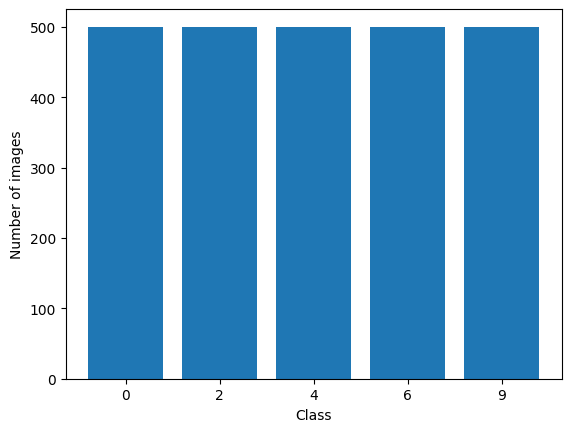

In [4]:
# Visualize the distribution of labels
categories = np.unique(labels)
unique,count = np.unique(labels,return_counts = True)
print(unique, count)
plt.bar(categories,count)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.show()

This plot shows the number of samples in each class. By visualizing the distribution of labels, we can see if the dataset is balanced or imbalanced. This is a balanced dataset because it has roughly the same number of samples in each class.

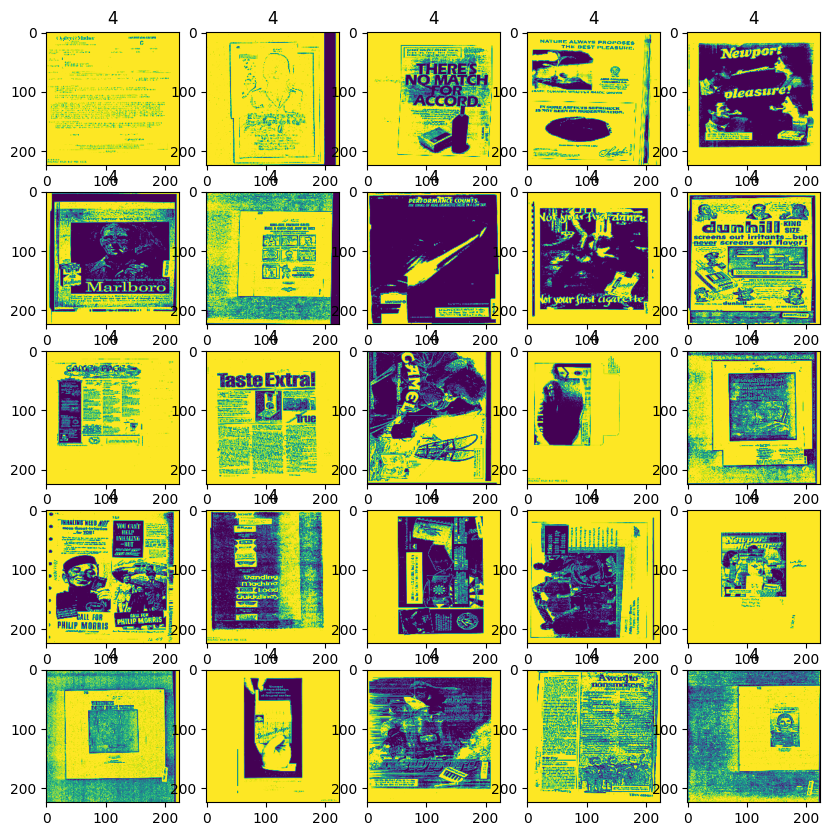

In [5]:
# Visualize some sample images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i])
    ax.set_title(labels[i])
plt.show()

By visualizing the images, we can get an idea of the quality of the images and the complexity of the dataset. We can also check if the images are properly labeled.

In [6]:
# Compute some basic statistics
print('Mean pixel value:', np.mean(data))
print('Median pixel value:', np.median(data))
print('Pixel value standard deviation:', np.std(data))
print('Pixel value range:', np.min(data), '-', np.max(data))


Mean pixel value: 0.89772445
Median pixel value: 1.0
Pixel value standard deviation: 0.26104826
Pixel value range: 0.0 - 1.0


It calculates some basic statistics such as mean, median, and standard deviation of the pixel intensities of the images. By computing these statistics, we can get an idea of the range and distribution of pixel intensities in the dataset.

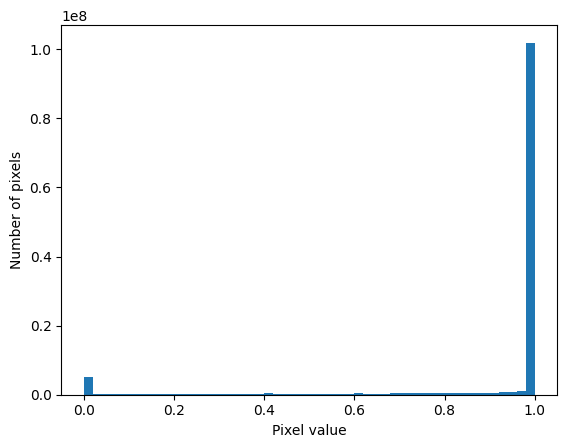

In [ ]:
# Visualize the pixel intensity distribution
plt.hist(data.flatten(), bins=50)
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.show()

This method shows the distribution of pixel intensities in the images. By visualizing the distribution of pixel intensities, we can get an idea of the contrast and brightness of the images. We can also check if the images are properly preprocessed and normalized.

The majority of the image is composed of pixels with lower intensity values. This could indicate that the images are mostly dark and have low contrast. We already knew this from the data.

## Feature Selection

To select the most relevant features for the classification task.

In [ ]:
# Select the top 1000 features based on ANOVA F-value
selector = SelectKBest(f_classif, k=1000)

# Fit the selector on the training data
selector.fit(flat_data, labels)

# Transform the data to keep only the selected features
selected_data = selector.transform(flat_data)

print("Shape of flat_data",flat_data.shape)
print("Shape of selected_data",selected_data.shape)

Shape of flat_data (2500, 50176)
Shape of selected_data (2500, 1000)


But for now we are not considering this Feature selection because of the time constrain. Trying to achive best performance without the Feature selection.

## Model Selection

For image classification, We are using this algorithms

1. SVM
2. Random Forest
3. Logistic
4. Ensemble SVM
5. CNNs

## Model Training

In [7]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(flat_data, labels, test_size=0.2, random_state=42)


### SVM

In [8]:


# Parameters for grid search, but we are not performing the grid search because it will take 12+ hours to run

'''
param_grid = [{ 'C' : [1,10,100,1000], 'kernel': ['linear']},
              { 'C' : [1,10,100,1000], 'gamma': [0.001,0.0001], 'kernel': ['rbf']}
              ]
'''

svc = svm.SVC(probability = True)
#clf = GridSearchCV(svc,param_grid)
svc.fit(x_train,y_train)
      

SVC(probability=True)

In [21]:
# remove this code in the end
pickle.dump(svc,open('svc_2.p','wb'))

In [31]:
# Evaluate the model performance 
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_pred,y_test) 
print("accuracy of svm model: ",accuracy)
confusion_matrix(y_pred,y_test)

accuracy of svm model:  0.654


array([[76,  9, 10,  9, 11],
       [10, 96,  1,  6,  3],
       [ 6,  0, 67,  7,  9],
       [ 9,  3,  7, 52, 29],
       [ 7,  3, 15, 19, 36]])

It seems that our classification model has made some correct predictions (the diagonal elements) and some incorrect predictions (the off-diagonal elements).

In [32]:
# Print the classification report to evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       108
           2       0.83      0.86      0.85       111
           4       0.75      0.67      0.71       100
           6       0.52      0.56      0.54        93
           9       0.45      0.41      0.43        88

    accuracy                           0.65       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.65      0.65      0.65       500



The SVM model has an accuracy of 0.65, which means that it correctly predicts the class of 65% of the test samples. Looking at the precision, recall, and f1-score metrics, we see that the model performs reasonably well for classes 0, 2, and 4 with f1-scores of 0.68, 0.85, and 0.71, respectively. However, it performs poorly for classes 6 and 9 with f1-scores of 0.54 and 0.43, respectively. This suggests that the model might have difficulty distinguishing between classes 6 and 9. The weighted average f1-score of 0.65 suggests that the model performs moderately well.

### LogisticRegression

In [ ]:
# Instantiate a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Evaluate the model on the testing data
accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.494


Not better than SVM.

### RandomForestClassifier

In [ ]:
# Train the Random Forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predict the labels of the test data using the trained classifier
y_pred = rf.predict(x_test)

# Print the classification report to evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69       108
           2       0.86      0.82      0.84       111
           4       0.81      0.59      0.68       100
           6       0.54      0.62      0.58        93
           9       0.52      0.50      0.51        88

    accuracy                           0.67       500
   macro avg       0.67      0.66      0.66       500
weighted avg       0.68      0.67      0.67       500



Looking at the precision, we can see that Random Forest performs well for classes 2 and 4 with scores of 0.86 and 0.81, respectively. For class 0, the precision score is 0.64, and for classes 6 and 9, the score is 0.54 and 0.52, respectively, indicating moderate performance.

In terms of recall, we see that the model performs well for class 0 and 2 with scores of 0.76 and 0.82, respectively, but performs poorly for classes 4, 6, and 9 with scores of 0.59, 0.62, and 0.50, respectively.

The F1-score is a measure of the model's balance between precision and recall. The overall weighted F1-score for this model is 0.67, indicating that the model is performing moderately well overall.

Therefore, we can conclude that the Random Forest model is doing reasonably well, but it may require further optimization to improve its performance on classes 4, 6, and 9.

### Ensembling on multiple SVM models

In [ ]:
# Create multiple SVM models with different hyperparameters
model1 = svm.SVC(kernel='linear', C=1, probability=True)
model2 = svm.SVC(kernel='rbf', C=1, probability=True)
model3 = svm.SVC(kernel='poly', C=1, degree=3, probability=True)

# Train the models on the training set
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)



In [ ]:
# Load the trained model from pickle file
model1 = pickle.load(open('/content/drive/MyDrive/data/ensemble_m1.p','rb'))
model2 = pickle.load(open('/content/drive/MyDrive/data/ensemble_m2.p','rb'))
model3 = pickle.load(open('/content/drive/MyDrive/data/ensemble_m3.p','rb'))

# Make predictions on the testing set using each of the trained SVM models
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

# Combine the predictions from each model using majority voting
y_pred = []
for i in range(len(y_pred1)):
    preds = [y_pred1[i], y_pred2[i], y_pred3[i]]
    y_pred.append(max(set(preds), key=preds.count))

# Evaluate the ensemble model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [30]:

# Print the classification report to evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       108
           2       0.83      0.86      0.85       111
           4       0.75      0.67      0.71       100
           6       0.52      0.56      0.54        93
           9       0.45      0.41      0.43        88

    accuracy                           0.65       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.65      0.65      0.65       500



From the report, we can see that the overall accuracy of the ensemble model is 65%, which is not very high. The macro-average F1-score is 64%, indicating that the model is performing similarly across all classes. However, the precision and recall for each class vary widely.

### CNNs

In [17]:
# perform one-hot encoding on the labels
labels = tf.keras.utils.to_categorical(labels)

# split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


In [20]:

# define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))


Epoch 1/10
63/63 [==============================] - 262s 4s/step - loss: 1.3654 - accuracy: 0.4960 - val_loss: 1.0993 - val_accuracy: 0.5820
Epoch 2/10
63/63 [==============================] - 258s 4s/step - loss: 0.8417 - accuracy: 0.6905 - val_loss: 0.8163 - val_accuracy: 0.7040
Epoch 3/10
63/63 [==============================] - 259s 4s/step - loss: 0.6678 - accuracy: 0.7520 - val_loss: 0.7902 - val_accuracy: 0.6860
Epoch 4/10
63/63 [==============================] - 258s 4s/step - loss: 0.5100 - accuracy: 0.8205 - val_loss: 0.6515 - val_accuracy: 0.7920
Epoch 5/10
63/63 [==============================] - 283s 5s/step - loss: 0.3395 - accuracy: 0.8820 - val_loss: 0.6777 - val_accuracy: 0.7940
Epoch 6/10
63/63 [==============================] - 255s 4s/step - loss: 0.1861 - accuracy: 0.9405 - val_loss: 0.7201 - val_accuracy: 0.7880
Epoch 7/10
63/63 [==============================] - 257s 4s/step - loss: 0.1181 - accuracy: 0.9635 - val_loss: 0.7525 - val_accuracy: 0.8140
Epoch 8/10
63

In [22]:

# evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print('Test accuracy:', test_acc)

16/16 - 16s - loss: 1.0019 - accuracy: 0.8000 - 16s/epoch - 983ms/step
Test accuracy: 0.800000011920929


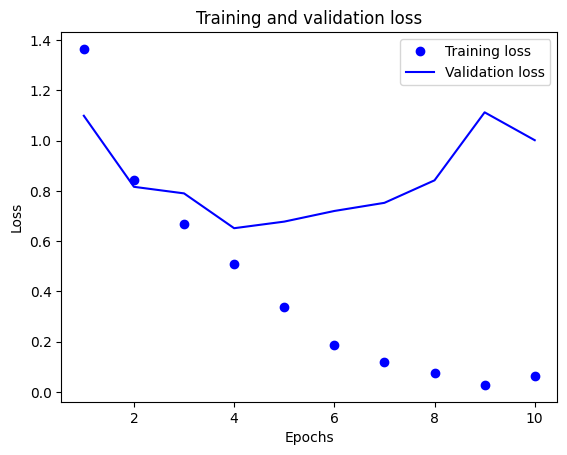

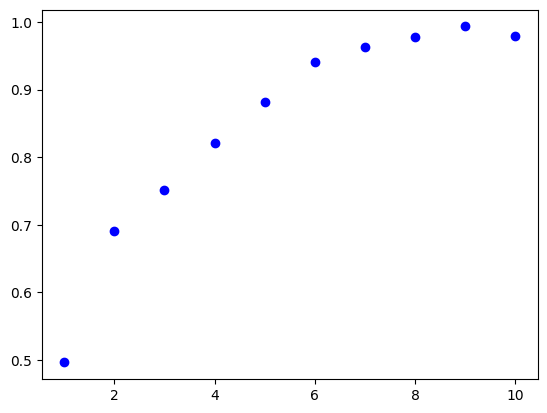

In [24]:

# plot the loss and accuracy curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'bo', label='Training')


That the model was evaluated on the test data, and the test accuracy was calculated to be 0.8 or 80.00%. The loss on the test data was 1.0019.

It indicates that the model correctly predicted the class of the test data 80% of the time, which is not bad, but could be improved. The loss value measures how well the model is able to minimize the difference between the predicted and actual class labels, with lower values indicating better performance.



### To improve the accuracy, we can perform this steps

Using the data augmentation

Try a different optimizer

Using a pre-trained model

Tune the hyperparameters:


## 1. Data augmentation

In [ ]:
# reshape the training data to add an extra dimension
train_data = np.expand_dims(train_data, axis=-1)

# create a data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images by up to 20 degrees
    width_shift_range=0.1,  # randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # randomly shift images vertically by up to 10%
    zoom_range=0.1,  # randomly zoom images by up to 10%
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False  # don't randomly flip images vertically
)

# fit the data augmentation generator to the training data
datagen.fit(train_data)

# train the model using the augmented data
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32), 
                    steps_per_epoch=len(train_data)//32, epochs=10, 
                    validation_data=(test_data, test_labels))


In [25]:

# Load the model
loaded_model_data_aug = load_model('/content/drive/MyDrive/data/CNN_data_aug_my')

# evaluate the model on the test data
test_loss, test_acc = loaded_model_data_aug.evaluate(test_data, test_labels, verbose=2)
print('Test accuracy:', test_acc)

16/16 - 16s - loss: 0.3697 - accuracy: 0.8680 - 16s/epoch - 994ms/step
Test accuracy: 0.8679999709129333


We got 6% increment in accuracy and the loss reduced nearly 70%. The test accuracy was calculated to be 0.86 or 86%. The loss on the test data was 0.3. Better than the previous CNN model.

The Loss function has dicreased. (lower loss value indicates better performance.)

## 2. Try a different optimizer
##    Stochastic Gradient Descent (SGD).

In [ ]:
# define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# compile the model with SGD optimizer
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))


In [27]:

# Load the model
loaded_model_SGD = load_model('/content/drive/MyDrive/data/SGD_my')

# evaluate the model on the test data
test_loss, test_acc = loaded_model_SGD.evaluate(test_data, test_labels, verbose=2)
print('Test accuracy:', test_acc)

16/16 - 18s - loss: 0.7858 - accuracy: 0.7160 - 18s/epoch - 1s/step
Test accuracy: 0.7160000205039978


The accuracy reported is 71.6%, which means that the model correctly classified 71.6% of the test samples. Which is not better tahn CNNs data agumentation.

# Conclusion: 

### After building and testing multiple models, I found that the CNN with data augmentation performed the best, achieving an accuracy score of 0.86 and a loss of 0.36. While this model showed promising results, given more time to work on this project, I would have explored more powerful techniques and implemented feature selection to further improve the model's performance.

# Text-based classification using the provided OCR data (NLP)

## Data Preprocessing

In [ ]:
# Function to make a data frame from the given text documents

def eda_ocr_data(directory):
    """
    Perform exploratory data analysis on OCR data
    
    Args:
    directory - path to directory containing OCR data files
    
    Returns:
    None
    """
    
    # Function to make a data frame from the given text documents
    def extract_data(directory):
        data = []
        for subdir, dirs, files in os.walk(directory):
            for file in files:
                if file.endswith('.TIF.txt'):
                    with open(os.path.join(subdir, file), 'r') as f:
                        text = f.read()
                    data.append({'File_name': file.split('.TIF')[0], 'Text': text, 'Label': os.path.basename(subdir)})
        df = pd.DataFrame(data)
        return df

    # Calling the function to extract the OCR data into a dataframe
    df = extract_data(directory)
    
    # Print basic information about the data
    print("Shape of dataframe:", df.shape)
    print("\nData types:\n", df.dtypes)
    print("\nNumber of missing values:\n", df.isnull().sum())
    print("\nValue counts of Label column:\n", df['Label'].value_counts())
    
    # Add a new column with the length of the text in each row
    df['Text_length'] = df['Text'].apply(len)
    
    return None


In [ ]:
 # Calling the function
eda_ocr_data(dataset_path_ocr)


Shape of dataframe: (2500, 3)

Data types:
 File_name    object
Text         object
Label        object
dtype: object

Number of missing values:
 File_name    0
Text         0
Label        0
dtype: int64

Value counts of Label column:
 9    500
4    500
0    500
2    500
6    500
Name: Label, dtype: int64


In [ ]:
df.head()  # Top 5 rows


,File_name,Text,Label
0,010f6915-fe1e-4a36-8041-1e4036acab93,200343)2394\n\n \n\n010) asuodsax uy sour\n...,9
1,007db023-cd74-41f0-ab60-f8e47f346266,Mar 13°96\nMARS 9 1908\n\n8335\n\nMINNEAPOLIS ...,9
2,0163b9b4-bd91-4941-9484-f725599c1444,fs! 2046965323\n\nKatea‘noag vat db 0 sea mas ...,9
3,018d77b3-eeec-45a5-859b-c3fde5c77295,"\n\n \n\n \n\n‘SUN-TIMES\nChicago, Illinois\n...",9
4,025c2e73-6643-41a9-92db-0ddc9ee5ffbb,\n\n“ ROAZ7IOZ 7\n\nPage 4\nAmerican Medical ...,9


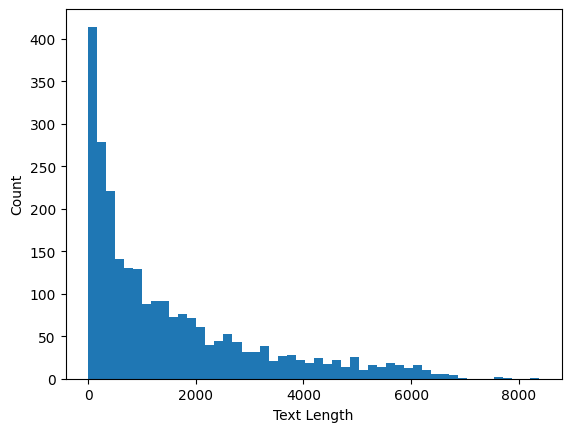

In [ ]:
# histogram of the text length
df['Text_length'] = df['Text'].apply(len)
plt.hist(df['Text_length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


This will give us a visual representation of the distribution of text lengths.

In [ ]:
# Check the most common words in the text column

word_counts = Counter(" ".join(df['Text']).split()).most_common(50)
print(word_counts)

[('the', 19764), ('of', 17036), ('and', 11377), ('to', 9406), ('in', 7934), ('a', 6513), ('for', 4216), ('that', 3951), ('is', 3173), ('by', 3039), ('with', 2769), ('on', 2760), ('be', 2652), ('The', 2536), ('are', 2071), ('as', 1980), ('was', 1910), ('have', 1902), ('from', 1855), ('at', 1816), ('were', 1586), ('or', 1575), ('this', 1442), ('an', 1429), ('|', 1376), ('not', 1258), ('has', 1230), ('you', 1159), ('we', 1124), ('been', 1109), ('which', 1077), ('will', 1008), ('i', 959), ('smoking', 927), ('it', 922), ('In', 921), ('tobacco', 866), ('he', 795), ('2', 780), ('1', 769), ('‘The', 757), ('&', 737), ('these', 711), ('-', 704), ('A', 697), ('than', 693), ('I', 680), ('your', 680), ('would', 675), ('may', 675)]


This will give us a list of the 50 most common words in the text column.

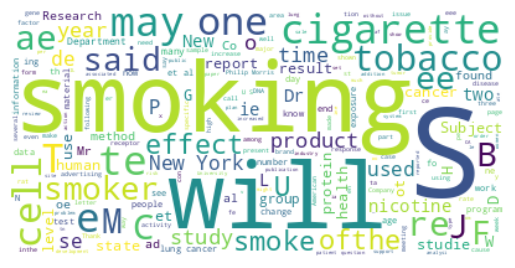

In [ ]:
#Plot a word cloud of the text column

wordcloud = WordCloud(background_color='white').generate(" ".join(df['Text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This will give us a visual representation of the most common words in the text column.

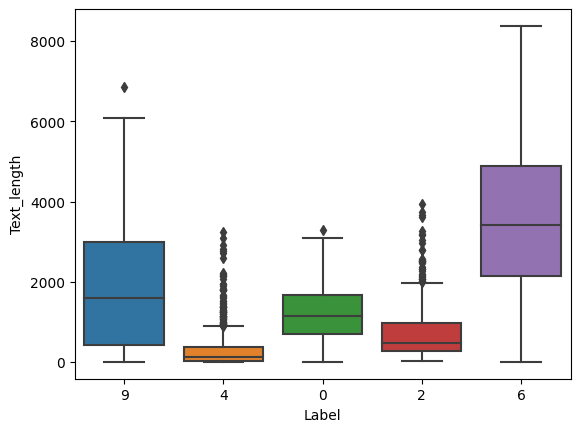

In [ ]:
# Check the correlation between the text length and label columns

sns.boxplot(x='Label', y='Text_length', data=df)
plt.show()



This will give us a visual representation of the correlation between the text length and label columns.

In [ ]:

# Split the dataframe into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

# Convert text data to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


#### To improve the quality of the text, more advanced techniques can be applied, such as removing punctuation, converting all text to lowercase, removing stop words, and performing stemming or lemmatization. However, due to time constraints, I proceeded with using basic techniques for text cleaning.

In [28]:
'''
# Perform text preprocessing
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def text_preprocessing(text):
    # convert text to lowercase
    text = text.lower()

    # remove stop words
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # stem the tokens
    stemmed_tokens = [porter.stem(token) for token in filtered_tokens]

    # join the tokens back into a string
    preprocessed_text = " ".join(stemmed_tokens)

    return preprocessed_text

df1 = df.copy()
df1['Text'] = df1['Text'].apply(text_preprocessing)

# Vectorize the text data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df1['Text'])

# Add the vectorized data to the dataframe
for i in range(X.shape[1]):
    col_name = "feature_" + str(i)
    df1[col_name] = X[:,i].todense()

# Drop the original text column and only keep the vectorized features and the label
df1 = df1.drop(['Text'], axis=1)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,1:], df1.iloc[:,0], test_size=0.2, random_state=42)

'''

# Model Selection
For text classification, We are using this algorithms

1. Naive Bayes
2. Support Vector Machines (SVM)
3. Logistic Regression
4. Random Forest
5. Gradient Boosting

## SVM

In [ ]:

# Train the SVM classifier on the training data
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict the labels of the test data using the trained classifier
y_pred = svm.predict(X_test)

# Print the classification report to evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.81      0.86       108
           2       0.98      0.85      0.91       111
           4       0.72      0.86      0.78        88
           6       0.94      0.84      0.89        93
           9       0.70      0.83      0.76       100

    accuracy                           0.84       500
   macro avg       0.85      0.84      0.84       500
weighted avg       0.85      0.84      0.84       500



The SVM model achieved an overall accuracy of 0.838 on text classification, which suggests that the model is able to correctly predict the class labels for a large proportion of the test samples. Looking at the precision, recall, and f1-score for each class, we can see that the model performs well for some classes and less well for others. And the the macro and weighted averages for precision, recall, and f1-score are both around 0.84-0.85, indicating that the model is performing reasonably well across all classes.

# ensemble model

In [ ]:

# Initialize the models
mnb = MultinomialNB()
svm = SVC(probability=True)
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('mnb', mnb), ('svm', svm), ('lr', lr), ('rf', rf), ('gb', gb)], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model
acc = voting_clf.score(X_test, y_test)
print("Accuracy of the ensemble model: ", acc)


Accuracy of the ensemble model:  0.834


This ensemble model that combines different machine learning algorithms including Naive Bayes, SVM, Logistic Regression, Random Forest, and Gradient Boosting, achieved an accuracy of 0.83 on text data. This suggests that the combination of these models can be useful in improving the performance of text classification tasks. 

Further experimentation and fine-tuning may be necessary to achieve the best possible results

# Conclusion based on both Image and Text classification

After trying various methods in image and text classification, the CNNs data augmentation technique provided the best accuracy of 86% for image classification, while an ensemble model gave the best accuracy of 83% for text classification. Despite attempting hyperparameter tuning and feature selection, it was time-consuming. If given more time, I would have continued to explore other techniques to improve the accuracy of the models. This project highlights the importance of selecting appropriate models and techniques for specific tasks and the need for continuous improvement in machine learning projects.